# Handling Imbalance Dataset



## Content

1. <a href = "#1.-Imbalance-Data"> Imbalance Data</a>
2. <a href = "#2.-Techniques-used">Techniques Used</a>
3. <a href = "#3.-Random-under-sampling">Random Under Sampling</a>
            - Random Under Sampling 
            - Tomek Lines
            - Cluster Centroid under-sampling
            - Near Miss under-sampling
4. <a href = "#4.-Random-over-sampling">Random Over Sampling</a>
            - Random Over Sampling
5. <a href = "#5.-Synthetic-data-generation">Synthetic data generation</a>
            - Synthetic Minority Oversampling Technique (SMOTE)
            - Adaptive Synthetic Technique (ADASYN)
6. <a href = "#6.-Ensemble-methods">Ensemble Methods</a>
            - Balanced Bagging Classifier
            - RUS Boosting Classifier
            - Easy Ensemble Classifier
7. <a href = "#7.-Conclusion">Conclusion</a>
       


## 1. Imbalance Data

In Machine Learning we often come across a term called Imbalanced Data Distribution, where the number of observations belonging to one class is significantly lower than those belonging to the other classes. ML algorithms tend to produce unsatisfactory classifiers when faced with imbalanced datasets. For any imbalanced data set, if the event to be predicted belongs to the minority class and the event rate is less than 5%, it is usually referred to as a rare event.

**Examples of Imbalance Data**
- Finance: Fraud detection datasets commonly have a fraud rate of ~1–2%
- Telecom: Classifying probable churning customers to reduce the churn rate
- Transportation/Airline: Will Airplane failure occur
- Medical: Does a patient has cancer

**Why traditional ML models does not work well with Imbalance Datasets** 

Machine Learning Algorithms are usually designed to improve accuracy by reducing the error. Thus, they do not take into account the class distribution / proportion or balance of classes.
Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class. In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when minority class has negligible or very lesser recall.



## 2. Techniques used


A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

## 3. Random under-sampling

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.



![undersampling.png](undersampling.png)

In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

#### Advantages:
- If the dataset is huge, we might face run time and storage problems. Undersampling can help to handle these problems successfully by improving run time and storage problems by reducing the number of training data samples.

#### Disadvantages:
- This method can discard potentially useful information which could be important for building the classifiers.
- The sample chosen by random under sampling may be a biased one. It may not be an accurate representation of the population. So, it results in inaccurate results with the actual dataset.

### Python Implementation of Random Under Sampling

In [33]:
# import Python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
%matplotlib inline

#Import dataset
#Dataset Link: https://www.kaggle.com/mlg-ulb/creditcardfraud

basepath = '../../Data\\creditcard.csv'
df = pd.read_csv(basepath)
# check dataset
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [34]:
# check the distribution of Class column

df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

    Total Transaction    = 284,807 
    Fraudulent trans     = 492
    Non-Fraudulent trans = 284315 


Now, Calculating the percentage of labels 0 and 1 within the `Class` column.

    0    99.8273%
    1    0.1727%

We can see that the `Class` column is highly imbalanced. It contains 99.82% labels as `0` and 0.17% labels as `1`. 


C:\Users\KVSH2\AppData\Local\Temp\1\ipykernel_25508\3478965371.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (df['Class'].value_counts()/np.float(len(df))).plot.bar()


<AxesSubplot: >

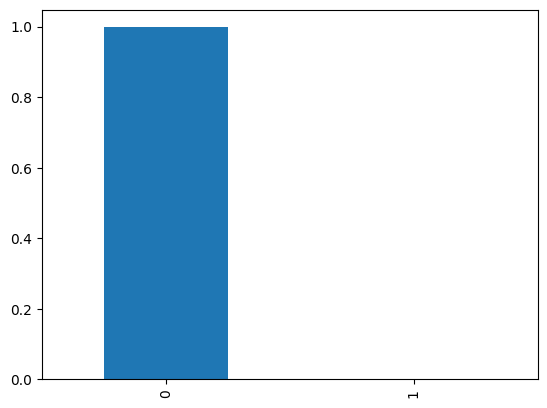

In [10]:
# view the distribution of percentages within the Class column


(df['Class'].value_counts()/np.float(len(df))).plot.bar()

In [11]:
# separate the minority and majority classes
df_majority = df[df['Class']==0]
df_minority = df[df['Class']==1]

In [12]:
# Applying UnderSampling
# undersample majority class

df_majority_undersampled = resample(df_majority, replace=True, n_samples=492, random_state=0) 

In [13]:
# combine majority class with oversampled minority class

df_undersampled = pd.concat([df_minority, df_majority_undersampled])

In [14]:
# display new class value counts

df_undersampled['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

Now, we can see that the new dataframe `df_undersampled` has fewer observations than the original one `df` and the ratio of the two classes is now 1:1.

Again, I will train a model using Logistic Regression classifier.

In [15]:
# Model Building

# declare feature vector and target variable
X2 = df_undersampled.drop(['Class'], axis=1)
y2 = df_undersampled['Class']

# import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# instantiate the Logistic Regression classifier
logreg2 = LogisticRegression()


# fit the classifier to the imbalanced data
clf2 = logreg2.fit(X2, y2)


# predict on the training data
y2_pred = clf2.predict(X2)


# print the accuracy
accuracy2 = accuracy_score(y2_pred, y2)

print("Accuracy : %.2f%%" % (accuracy2 * 100.0))


Accuracy : 93.19%


### Random under sampling using Algorithm

There is a Python library which enable us to handle the imbalanced datasets. It is called **Imbalanced-Learn**.      
    **For Installation:  pip install imbalanced-learn**

Then, I will import the `RandomUnderSampler` class. It is a quick and easy way to balance the data by randomly selecting a subset of data for the targeted classes. 

[PyPi Link](https://pypi.org/project/imbalanced-learn/#id26)

In [17]:
pip install imblearn

     -------------------------------------- 199.3/199.3 kB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
# import imbalanced learn library
# pip install imbalanced-learn

import imblearn

# import RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

# instantiate the RandomUnderSampler
rus = RandomUnderSampler()

# declare feature vector and target variable

X = df.drop(['Class'], axis=1)
y = df['Class']

# fit the RandomUnderSampler to the dataset
X_rus, y_rus = rus.fit_resample(X, y)

### Tomek Links

Tomek links are defined as the two observations of different classes which are nearest neighbours of each other.

The figure below illustrate the concept of Tomek links-


![tomek.png](attachment:tomek.png)



We can see in the above image that the Tomek links (circled in green) are given by the pairs of red and blue data points that are nearest neighbors. Most of the classification algorithms face difficulty due to these points. So, I will remove these 
points and increase the separation gap between two classes.  Now, the algorithms produce more reliable output.

This technique will not produce a balanced dataset. It will simply clean the dataset by removing the Tomek links. It may result in an easier classification problem. Thus, by removing the Tomek links, we can improve the performance of the classifier even if we don’t have a balanced dataset.


So, removing the Tomek links increases the gap between the two classes and thus facilitate the classification process.

**Advantages**
- It is quite conservative; that is, it is good at finding and removing points we are quite certain are outliers (though it pays to inspect the result yourself afterwards, just to be sure the right things were removed).

**Disadvantages**
- Not easily tunable
- Sometimes it retains outliers

In [19]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X, y)

In [20]:
print(X_tl.shape, y_tl.shape)

(284736, 30) (284736,)


### Cluster Centroids


In this technique, we perform under-sampling by generating centroids based on clustering methods. The dataset will be grouped
by similarity, in order to preserve information.

In [21]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X, y)

print(X.shape[0] - X_cc.shape[0], 'New points undersampled under Cluster Centroids')

283823 New points undersampled under Cluster Centroids


### Near miss undersampling
[Reference Link](https://imbalanced-learn.org/dev/auto_examples/under-sampling/plot_illustration_nearmiss.html#sphx-glr-auto-examples-under-sampling-plot-illustration-nearmiss-py)

In order to tackle the issue of potential information loss, near-neighbor method and its variations have been proposed and widely used. When instances of two different classes are very close to each other, we remove the instances of the majority class to increase the spaces between the two classes. This helps in the classification process.

In near miss undersampling, we only sample the data points from the majority class which are necessary to distinguish the majority class from other classes.

The basic intuition about the working of near-neighbor methods is as follows:

* Step 1: The method first finds the distances between all instances of the majority class and the instances of the minority class. Here, majority class is to be under-sampled.
* Step 2: Then, n instances of the majority class that have the smallest distances to those in the minority class are selected.
* Step 3: If there are k instances in the minority class, the nearest method will result in k*n instances of the majority class.

#### NearMiss-1

NearMiss-1 selects samples from the majority class for which the average distance to some nearest neighbours is the smallest. In the following example, we use a 3-NN to compute the average distance on 2 specific samples of the majority class. Therefore, in this case the point linked by the green-dashed line will be selected since the average distance is smaller.

![nearmiss1.png](attachment:nearmiss1.png)

#### NearMiss-2

NearMiss-2 selects samples from the majority class for which the average distance to the farthest neighbors is the smallest. With the same configuration mentioned above that the sample linked to the green-dashed line will be selected since its distance the 3 farthest neighbors is the smallest.

![nearmiss2.png](attachment:nearmiss2.png)

In [22]:
from imblearn.under_sampling import NearMiss

nr = NearMiss()
X_nm, y_nm = nr.fit_resample(X, y)
print("Previous size",X.shape, "NearMiss Sample",X_nm.shape )

print("\nHere, the majority class has been reduced to the total number of minority class, so that both classes will have equal number of records.")

Previous size (284807, 30) NearMiss Sample (984, 30)

Here, the majority class has been reduced to the total number of minority class, so that both classes will have equal number of records.


In [23]:
print(np.bincount(y_nm))
print("\nNearMiss has created a sample with target variable in the ratio of 1:1")

[492 492]

NearMiss has created a sample with target variable in the ratio of 1:1


## 4. Random over-sampling

![oversampling.png](oversampling.png)

The Oversampling methods work with the minority class. In these methods, we duplicate random instances of the minority class. So, it replicates the observations from minority class to balance the data. It is also known as upsampling. It may result in overfitting due to duplication of data points.
The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting.

**Random oversampling**

In random oversampling, we balance the data by randomly oversampling the minority class.

**Advantages**

* An advantage of this method is that it leads to no information loss.

* This method outperform under sampling.

**Disadvantages**

* This method increases the likelihood of overfitting as it replicates the minority class labels.

In [24]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(X, y)

print(X.shape, X_ros.shape, y_ros.shape)

(284807, 30) (568630, 30) (568630,)


In [25]:
print(X_ros.shape[0] - X.shape[0], 'new random points generated')

283823 new random points generated


## 5. Synthetic data generation

### (SMOTE - Synthetic Minority Oversampling Technique)

SMOTE is an over-sampling method. What it does is, it creates synthetic (not duplicate) samples of the minority class. Hence making the minority class equal to the majority class. SMOTE does this by selecting similar records and altering that record one column at a time by a random amount within the difference to the neighbouring records.

In the context of **synthetic data generation** , there is a powerful and widely used method known as synthetic minority oversampling technique or SMOTE. Under this technique, artificial data is created based on feature space. Artificial data is generated with bootstrapping and k-nearest neighbours algorithm. It works as follows:-

1. First of all, we take the difference between the feature vector (sample) under consideration and its nearest neighbour.

2. Then we multiply this difference by a random number between 0 and 1.

3. Then we add this number to the feature vector under consideration.

4. Thus we select a random point along the line segment between two specific features.

So, SMOTE generates new observations by interpolation between existing observations in the dataset.

![smote.png](smote.png)

In [26]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X_smote, y_smote = smt.fit_resample(X, y)
np.bincount(y_smote)

array([284315, 284315], dtype=int64)

In [27]:
print(X_smote.shape[0] - X.shape[0], 'new random points generated')

283823 new random points generated


### ADASYN vs SMOTE

* ADASYN generates more synthetic data from samples in the minority class, that are harder to classify and less synthetic data where it's less harder to classify, whereas in SMOTE, there is a uniform weight for all minority points.

* SMOTE uses only the minority class to train the KNN, on the contrary ADASYN uses all the samples to train the KNN

### Adaptive Synthetic Technique or ADASYN

This technique works in a similar way as SMOTE. But the number of samples generated is proportional to the number of nearby samples which do not belong to the same class. Thus it focusses on outliers when generating the new training samples.

**Advantages**
* Its adaptive nature of creating more data for “harder-to-learn” examples and allowing you to sample more negative data for the model.
* ADASYN can ultimately synthetically balance your data set.

**Disadvantages**
* For minority examples that are sparsely distributed, each neighbourhood may only contain 1 minority example.
* Precision of ADASYN may suffer due to adaptability nature.

[Reference Link](https://medium.com/@ruinian/an-introduction-to-adasyn-with-code-1383a5ece7aa)

In [28]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=42)
X_ada, y_ada = ada.fit_resample(X, y)
np.bincount(y_ada)

array([284315, 284298], dtype=int64)

In [29]:
print(X_ada.shape[0] - X.shape[0], 'new random points generated')

283806 new random points generated


## 6. Ensemble methods

In this section, we will take a look at an alternative approach to deal with imbalanced datasets. In this approach, we modify the existing classification algorithms to make them appropriate for imbalanced datasets.

In this approach, we construct several two stage classifiers from the original data and then we aggregate their predictions. The main aim of this ensemble technique is to improve the performance of single classifiers.

The ensemble technique are of two types - bagging and boosting. These techniques are discussed below:-

#### Bagging

Bagging is an abbreviation of Bootstrap Aggregating. In the conventional bagging algorithm, we generate n different bootstrap training samples with replacement. Then we train the algorithm on each bootstrap training samples separately and then aggregate the predictions at the end. Bagging is used to reduce overfitting in order to create strong learners so that we can generate strong predictions. Bagging allows replacement in the bootstrapped training sample.

The machine learning algorithms like logistic regression, decision tree and neural networks are fitted to each bootstrapped training sample. These classifiers are then aggregated to produce a compound classifier. This ensemble technique produces a strong compound classifier since it combines individual classifiers to come up with a strong classifier.

**Advantages**

* This technique improves stability and accuracy of machine learning algorithms.

* It reduces variance and overcomes overfitting.

* It improves misclassification rate of the bagged classifier.

* In noisy data situations bagging outperforms boosting.

**Disadvantages**

* Bagging works only if the base classifiers are not bad to begin with. Bagging with bad classifiers can further degrade the performance.

In [30]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#Splitting data 
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)


bbc = BalancedBaggingClassifier(random_state=42)

bbc.fit(X_train, y_train)
y_pred = bbc.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[69699  1383]
 [   14   106]]


### Boosting
#### RUSBoostClassifier

Boosting is an ensemble technique to combine weak learners to create a strong learner so that we can make accurate predictions. In boosting, we start with a base or weak classifier that is prepared on the training data.

The base learners are weak learners. So, the prediction accuracy is only slightly better than average. A classifier learning algorithm is said to be weak when small changes in data results in big changes in the classification model.

In [31]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

clf = RUSBoostClassifier(random_state=0)
clf.fit(X, y) 
clf.predict(X) 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### EasyEnsembleClassifier

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.ensemble import EasyEnsembleClassifier 


X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

eec = EasyEnsembleClassifier(random_state=42)
eec.fit(X_train, y_train) 

y_pred = eec.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[68756  2326]
 [   11   109]]


## 7. Conclusion


We have discussed various approaches to deal with the problem of imbalanced classes. These are random oversampling, random undersampling, tree-based algorithms, resampling with imbalanced learn library, under-sampling : Tomek links, under-sampling : Cluster Centroids and over-sampling : SMOTE.

Some combination of these approaches will help us to create a better classifier. Simple sampling techniques may handle slight imbalance whereas more advanced methods like ensemble methods are required for extreme imbalances. The most effective technique will vary according to the dataset.

So, based on the above discussion, we can conclude that there is no one solution to deal with the imbalanced classes problem. We should try out multiple methods to select the best-suited sampling techniques for the dataset in hand. The most effective technique will vary according to the characteristics of the dataset.

[Reference Link](https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/)
* https://imbalanced-learn.org/en/stable/index.html
* https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/
* https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/
* https://elitedatascience.com/imbalanced-classes
* https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/
* https://www.kaggle.com/souravsaha1605/comprehensive-guide-on-imbalanced-data-handling
* https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [ ]:
#tested:no errors